**基于逻辑回归的Kaggle泰坦尼克号灾难预测**

**泰坦尼克号灾难预测背景：**

训练和测试数据是一些乘客的个人信息以及存活状况，要尝试根据它生成合适的模型并预测其他人的存活状况。

**1 数据的基本信息**

Kaggle共给了参赛者两个数据集，train.csv与test.csv，本文基于train.csv建模，故拿到数据第一步便先来了解它的基本信息。

**1.1 数据的基本信息**

初探数据，了解数据集的行与列，数据类型，数据大小等等。

从下列可以观察到，数据总共有891行，12列，各列信息为：
*     PassengerId：乘客ID
*     Survived：是否生还（0否，1是）
*     Pclass：乘客等级（上中下）
*     Name：乘客姓名
*     Sex：乘客性别
*     Age：年龄
*     SibSp：堂兄弟姐妹的个数
*     Parch：父母和小孩的个数
*     Ticket：船票信息
*     Fare：船票价格
*     Cabin：客舱信息
*     Embarked：港口

年龄、客舱信息、港口均有缺失值，后续建模如需利用起数据，需先对其进行处理。

In [61]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import Series,DataFrame
data_train=pd.read_csv("train.csv")
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [63]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**1.2 数据的统计描述**

在统计描述中，本文观察到，大概0.383838的人最后获救了，2/3等舱的人数比1等舱要多，平均乘客年龄大概是29.7岁(计算这个时候会略掉无记录的)等等…

In [64]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**2 数据可视化分析**

**2.1 总体可视化分析**


被救的人300多点，不到半数；等级为3的乘客约为等级为1、2之和；遇难和获救的人年龄似乎跨度都很广；3个不同的舱年龄总体趋势似乎也一致，2/3等舱乘客20岁多点的人最多，1等舱40岁左右的最多；登船港口人数按照S、C、Q递减，而且S远多于另外俩港口。

大胆做出一些猜测：

* 不同舱位/乘客等级可能和财富/地位有关系，最后获救概率可能会不一样

* 年龄对获救概率也一定是有影响的，毕竟题目说了，副船长还说『小孩和女士先走』呢

* 和登船港口是不是有关系呢？也许登船港口不同，人的出身地位不同？


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BBA4D88CF8>,
      dtype=object)

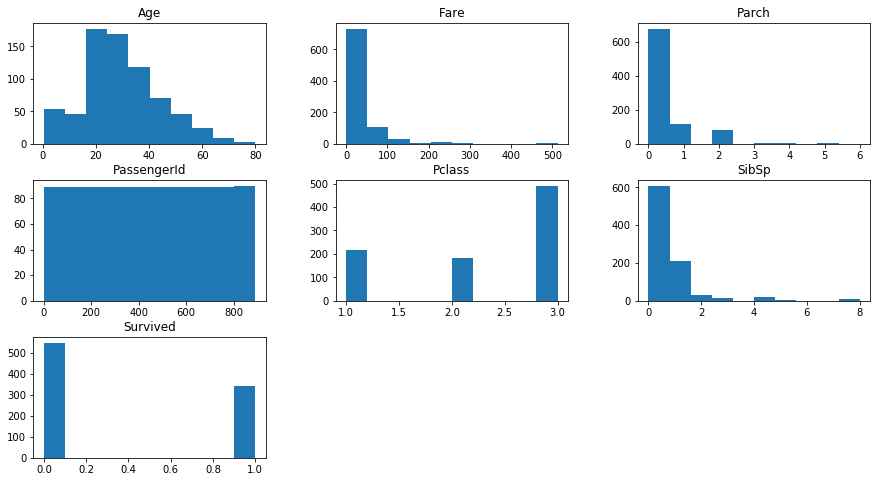

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt

data_train.hist(bins=10,figsize=(15,8),grid=False)

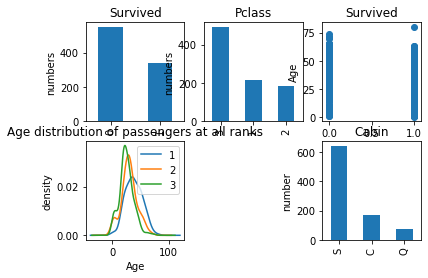

In [66]:
fig=plt.figure()
fig.set(alpha=0.2)

plt.subplot(2,3,1)
data_train.Survived.value_counts().plot(kind='bar')
plt.title('Survived')
plt.ylabel("numbers")

plt.subplot(2,3,2)
data_train.Pclass.value_counts().plot(kind='bar')
plt.title('Pclass')
plt.ylabel("numbers")

plt.subplot(2,3,3)
plt.scatter(data_train.Survived,data_train.Age)
plt.title('Survived')
plt.ylabel("Age")

plt.subplot(2,3,4)
data_train.Age[data_train.Pclass == 1].plot(kind='kde')   
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel("Age")# plots an axis lable
plt.ylabel("density") 
plt.title("Age distribution of passengers at all ranks")
plt.legend(('1', '2','3'),loc='best') # sets our legend for our graph.

plt.subplot(2,3,6)
data_train.Embarked.value_counts().plot(kind='bar')
plt.title("Cabin")
plt.ylabel("number")  
plt.show()

**2.2 属性与获救结果的关联统计**



**2.2.1 各乘客等级的获救情况**
乘客的获救率随着乘客等级的提高而提高，属于正向关系。

   S_0  S_1
1   80  136
2   97   87
3  372  119


Text(0, 0.5, 'Survived')

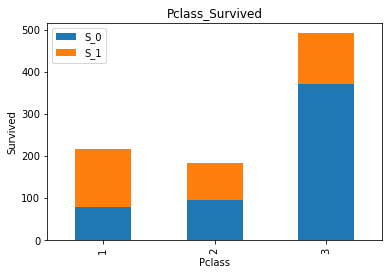

In [67]:
Survived_0=data_train.Pclass[data_train.Survived==0].value_counts()
Survived_1=data_train.Pclass[data_train.Survived==1].value_counts()
P_S=pd.DataFrame({'S_0':Survived_0,u'S_1':Survived_1})
print(P_S)
P_S.plot(kind='bar',stacked=True)
plt.title('Pclass_Survived')
plt.xlabel('Pclass')
plt.ylabel('Survived')

**2.2.2 各性别的获救情况**

女性的获救率远大于男性的获救率。

        S_0  S_1
female   81  233
male    468  109


Text(0, 0.5, 'Survived')

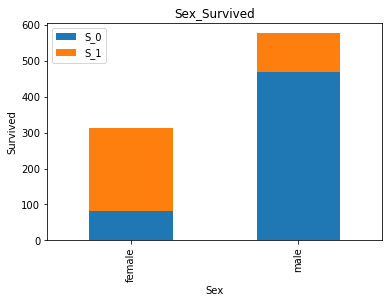

In [68]:
Survived_s0=data_train.Sex[data_train.Survived==0].value_counts()
Survived_s1=data_train.Sex[data_train.Survived==1].value_counts()
s_S=pd.DataFrame({'S_0':Survived_s0,u'S_1':Survived_s1})
print(s_S)
s_S.plot(kind='bar',stacked=True)
plt.title('Sex_Survived')
plt.xlabel('Sex')
plt.ylabel('Survived')

**2.2.1 各年龄阶段的获救情况**

                0      1
Age(0-10)    24.0   38.0
Age(10-40)  298.0  191.0
Age(40-70)   96.0   60.0
Age(70-80)    6.0    NaN


Text(0, 0.5, 'Survived')

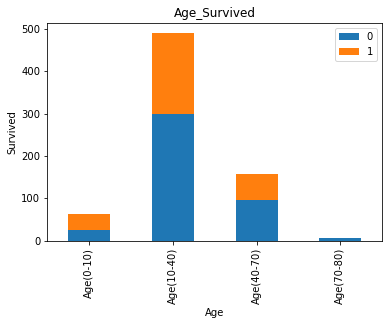

In [69]:
Age1=data_train.Survived[(data_train.Age>=0)&(data_train.Age<10)].value_counts()
Age2=data_train.Survived[(data_train.Age>=10)&(data_train.Age<40)].value_counts()
Age3=data_train.Survived[(data_train.Age>=40)&(data_train.Age<70)].value_counts()
Age4=data_train.Survived[(data_train.Age>=70)&(data_train.Age<80)].value_counts()
S_A=pd.DataFrame({'Age(0-10)':Age1,'Age(10-40)':Age2,'Age(40-70)':Age3,'Age(70-80)':Age4})
print(S_A.T)
S_A.T.plot(kind='bar',stacked=True)
plt.title('Age_Survived')
plt.xlabel('Age')
plt.ylabel('Survived')

可以观察到0-10岁的获救率高一些，但性别可能会对其产生影响，如年龄10-40岁的男性较多时，获救率会相应下降，似乎不太符合老人小孩获救率高的逻辑，我们进一步将年龄细化再观察。

            female   male
Age(0-10)     30.0   32.0
Age(10-40)   177.0  312.0
Age(40-70)    54.0  102.0
Age(70-80)     NaN    6.0


Text(0, 0.5, 'Survived')

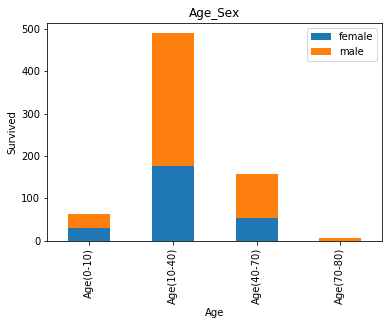

In [70]:
Age5=data_train.Sex[(data_train.Age>=0)&(data_train.Age<10)].value_counts()
Age6=data_train.Sex[(data_train.Age>=10)&(data_train.Age<40)].value_counts()
Age7=data_train.Sex[(data_train.Age>=40)&(data_train.Age<70)].value_counts()
Age8=data_train.Sex[(data_train.Age>=70)&(data_train.Age<80)].value_counts()
Sex_A=pd.DataFrame({'Age(0-10)':Age5,'Age(10-40)':Age6,'Age(40-70)':Age7,'Age(70-80)':Age8})
print(Sex_A.T)
Sex_A.T.plot(kind='bar',stacked=True)
plt.title('Age_Sex')
plt.xlabel('Age')
plt.ylabel('Survived')

**3 数据预处理**

**3.1 缺失值处理**

通常遇到缺值的情况，有几种常见的处理方式：

1、如果缺值的样本占总数比例极高，我们可能就直接舍弃了，作为特征加入的话，可能反倒带入noise，影响最后的结果了。

2、如果缺值的样本适中，而该属性非连续值特征属性(比如说类目属性)，那就把NaN作为一个新类别，加到类别特征中 如果缺值的样本适中，而该属性为连续值特征属性，有时候我们会考虑给定一个step(比如这里的age，我们可以考虑每隔2/3岁为一个步长)，然后把它离散化，之后把NaN作为一个type加到属性类目中。 

3、有些情况下，缺失的值个数并不是特别多，那我们也可以试着根据已有的值，拟合一下数据，补充上。

**3.1.1 Cabin缺失值处理**
按Cabin有无数据，将这个属性处理成Yes和No两种类型。

**3.1.2 Age缺失值处理**
用scikit-learn中的RandomForest来拟合一下缺失的年龄数据(注：RandomForest是一个用在原始数据中做不同采样，建立多颗DecisionTree，再进行average等等来降低过拟合现象，提高结果的机器学习算法）

In [71]:
from sklearn.ensemble import RandomForestRegressor

### 使用 RandomForestClassifier 填补缺失的年龄属性
def set_missing_ages(df):
    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].iloc[:,:].values
    unknown_age = age_df[age_df.Age.isnull()].iloc[:,:].values
    # y即目标年龄
    y = known_age[:, 0]

    # X即特征属性值
    X = known_age[:, 1:]
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
#     print(unknown_age[:, 1:])
    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1:])

    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    return df,rfr

def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df

data_train, rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)

In [72]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [73]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No,S


**3.2 特征因子化**

因为逻辑回归建模时，需要输入的特征都是数值型特征，我们通常会先对类目型的特征因子化。

以Cabin为例：原本Cabin取值为yes的，在此处的”Cabin_yes”下取值为1，在”Cabin_no”下取值为0 

In [13]:
d_Sex=pd.get_dummies(data_train['Sex'],prefix='Sex')
d_Pclass=pd.get_dummies(data_train['Pclass'],prefix='Pclass')
d_Embarked=pd.get_dummies(data_train['Embarked'],prefix='Embarked')
d_Cabin=pd.get_dummies(data_train['Cabin'],prefix='Cabin')
df=pd.concat([data_train,d_Sex,d_Pclass,d_Embarked,d_Cabin],axis=1)
df.drop(['Name','Sex','Pclass','Embarked','Cabin','Ticket'],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Cabin_No,Cabin_Yes
0,1,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1,1,0
1,2,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0,0,1
2,3,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1,1,0
3,4,1,35.0,1,0,53.1000,1,0,1,0,0,0,0,1,0,1
4,5,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1,1,0


**3.3 数据标准化**

接下来对Age和Fare进行数据标准化，即特征化到[-1,1]之内

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

age_p=sc.fit(df['Age'].values.reshape(-1,1))
df['Age_sc']=sc.fit_transform(df['Age'].values.reshape(-1,1),age_p)

fare_p=sc.fit(df['Fare'].values.reshape(-1,1))
df['Fare_sc']=sc.fit_transform(df['Fare'].values.reshape(-1,1),fare_p)
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Cabin_No,Cabin_Yes,Age_sc,Fare_sc
0,1,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1,1,0,-0.561380,-0.502445
1,2,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0,0,1,0.613171,0.786845
2,3,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1,1,0,-0.267742,-0.488854
3,4,1,35.0,1,0,53.1000,1,0,1,0,0,0,0,1,0,1,0.392942,0.420730
4,5,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1,1,0,0.392942,-0.486337


**4 逻辑回归建模**

把需要的feature字段取出来，转成numpy格式，使用scikit-learn中的LogisticRegression建模。

In [17]:
from sklearn import linear_model
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.iloc[:,:].values
y=train_np[:,0]
X=train_np[:,1:]
lr=linear_model.LogisticRegression(C=1.0, penalty='l2', tol=1e-6)
lr.fit(X, y)
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-06, verbose=0,
                   warm_start=False)

**5 逻辑回归系统优化**

**5.1 模型系数关联分析**

* Sex属性，如果是female会极大提高最后获救的概率，而male会很大程度拉低这个概率。

* Pclass属性，1等舱乘客最后获救的概率会上升，而乘客等级为3会极大地拉低这个概率。

* 有Cabin值会很大程度拉升最后获救概率(这里似乎能看到了一点端倪，事实上从最上面的有无Cabin记录的Survived分布图上看出，即使有Cabin记录的乘客也有一部分遇难了，估计这个属性上我们挖掘还不够)

* Age是一个负相关，意味着在我们的模型里，年龄越小，越有获救的优先权(还得回原数据看看这个是否合理）

* 有一个登船港口S会很大程度拉低获救的概率，另外俩港口压根就没啥作用(这个实际上非常奇怪，因为我们从之前的统计图上并没有看到S港口的获救率非常低，所以也许可以考虑把登船港口这个feature去掉试试)。

* 船票Fare有小幅度的正相关(并不意味着这个feature作用不大，有可能是我们细化的程度还不够，举个例子，说不定我们得对它离散化，再分至各个乘客等级上？)

In [18]:
pd.DataFrame({"columns":list(train_df.columns)[1:], "coef":list(lr.coef_.T)})

,columns,coef
0,SibSp,[-0.3496950029814253]
1,Parch,[-0.11594682707896077]
2,Sex_female,[1.3157857715684604]
3,Sex_male,[-1.3158675628010592]
4,Pclass_1,[0.6176426154597163]
5,Pclass_2,[0.2860885731252817]
6,Pclass_3,[-0.9038129798176006]
7,Embarked_C,[0.09105236312067194]
8,Embarked_Q,[0.08401648460580503]
9,Embarked_S,[-0.34985748691559376]


**5.2 交叉验证**

把train.csv分成两部分，一部分用于训练我们需要的模型，另外一部分数据上看我们预测算法的效果。

并把交叉验证里面的bad case拿出来观察，用人眼审核，争取发现一些蛛丝马迹，本文忽略了的信息，使得这些乘客被判定错了。再把bad case上得到的想法和前头系数分析的合在一起，然后逐个试试。

尝试着做数据分割，并且在原始数据集上瞄一眼bad case：

In [19]:
from sklearn.model_selection import cross_val_score, train_test_split
#简单看看打分情况
#clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
#all_data = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
#X = all_data.as_matrix()[:,1:]
#y = all_data.as_matrix()[:,0]

print(cross_val_score(lr, X, y, cv=5))

[0.81564246 0.80898876 0.79213483 0.78651685 0.81460674]


In [ ]:
# 分割数据，按照 训练数据:cv数据 = 7:3的比例
split_train, split_cv = train_test_split(df, test_size=0.3, random_state=42)

train_df = split_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
# 生成模型
lr = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
lr.fit(train_df.as_matrix()[:,1:], train_df.as_matrix()[:,0])

# 对cross validation数据进行预测

cv_df = split_cv.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = lr.predict(cv_df.as_matrix()[:,1:])

#origin_data_train = pd.read_csv("/home/kesci/input/titanic8120/train.csv")

bad_cases = data_train.loc[data_train['PassengerId'].isin(split_cv[predictions != cv_df.as_matrix()[:,0]]['PassengerId'].values)]
bad_cases

观察 bad cases，对数据进一步挖掘，本文可能可以做的优化操作：

* Age属性不使用现在的拟合方式，而是根据名称中的『Mr』『Mrs』『Miss』等的平均值进行填充。

* Age不做成一个连续值属性，而是使用一个步长进行离散化，变成离散的类目feature。

* Cabin再细化一些，对于有记录的Cabin属性，我们将其分为前面的字母部分(我猜是位置和船层之类的信息) 和 后面的数字部分(应该是房间号，有意思的事情是，如果你仔细看看原始数据，你会发现，这个值大的情况下，似乎获救的可能性高一些)。

* Pclass和Sex俩太重要了，我们试着用它们去组出一个组合属性来试试，这也是另外一种程度的细化。

* 单加一个Child字段，Age<=12的，设为1，其余为0(你去看看数据，确实小盆友优先程度很高啊)

* 如果名字里面有『Mrs』，而Parch>1的，我们猜测她可能是一个母亲，应该获救的概率也会提高，因此可以多加一个Mother字段，此种情况下设为1，其余情况下设为0
登船港口可以考虑先去掉试试(Q和C本来就没权重，S有点诡异)

* 把堂兄弟/兄妹 和 Parch 还有自己 个数加在一起组一个Family_size字段(考虑到大家族可能对最后的结果有影响)
Name是一个我们一直没有触碰的属性，我们可以做一些简单的处理，比如说男性中带某些字眼的(‘Capt’, ‘Don’, ‘Major’, ‘Sir’)可以统一到一个Title，女性也一样。

**5.3 learning curves**

有一个很可能发生的问题是，我们不断地做feature engineering，产生的特征越来越多，用这些特征去训练模型，会对我们的训练集拟合得越来越好，同时也可能在逐步丧失泛化能力，从而在待预测的数据上，表现不佳，也就是发生过拟合问题。

从另一个角度上说，如果模型在待预测的数据上表现不佳，除掉上面说的过拟合问题，也有可能是欠拟合问题，也就是说在训练集上，其实拟合的也不是那么好。
对过拟合而言，通常以下策略对结果优化是有用的：

做一下feature selection，挑出较好的feature的subset来做training
提供更多的数据，从而弥补原始数据的bias问题，学习到的model也会更准确 而对于欠拟合而言，我们通常需要更多的feature，更复杂的模型来提高准确度。
著名的learning curve可以帮我们判定我们的模型现在所处的状态。我们以样本数为横坐标，训练和交叉验证集上的错误率作为纵坐标。

我们也可以把错误率替换成准确率(得分)，得到另一种形式的learning curve(sklearn 里面是这么做的)。

回到我们的问题，我们用scikit-learn里面的learning_curve来帮我们分辨我们模型的状态。举个例子，这里我们一起画一下我们最先得到的learning curve。

c:\users\administrator\pycharmprojects\lihongyi_ml\venv\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\administrator\pycharmprojects\lihongyi_ml\venv\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\administrator\pycharmprojects\lihongyi_ml\venv\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26354 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\administrator\pycharmprojects\lihongyi_ml\venv\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32447 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\administrator\pycharmprojects\lihongyi_ml\venv\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35757 missing from current font.
  font.

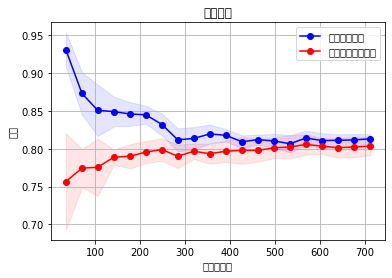

(0.8055053665368028, 0.027829684691101142)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.learning_curve import learning_curve  修改以fix learning_curve DeprecationWarning
from sklearn.model_selection import learning_curve

# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()
    
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")
    
        plt.legend(loc="best")
        
        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(lr, u"学习曲线", X, y)

在实际数据上看，我们得到的learning curve没有理论推导的那么光滑哈，但是可以大致看出来，训练集和交叉验证集上的得分曲线走势还是符合预期的。

目前的曲线看来，我们的model并不处于overfitting的状态(overfitting的表现一般是训练集上得分高，而交叉验证集上要低很多，中间的gap比较大)。因此我们可以再做些feature engineering的工作，添加一些新产出的特征或者组合特征到模型中。

**6 模型融合(model ensemble)**



In [24]:
from sklearn.ensemble import BaggingRegressor

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
train_np = train_df.iloc[:,:].values
df_test=pd.read_csv('test.csv')
# y即Survival结果
y = train_np[:, 0]

# X即特征属性值
X = train_np[:, 1:]

# fit到BaggingRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l2', tol=1e-6)
bagging_clf = BaggingRegressor(clf, n_estimators=20, max_samples=0.8, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=-1)
bagging_clf.fit(X, y)

test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
predictions = bagging_clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("Submission1.csv", index=False)

IndexError: index 3 is out of bounds for axis 1 with size 3

**模型构建成功**

开始处理test数据

In [ ]:
#1、读取test数据
data_test=pd.read_csv("../input/test.csv")
data_test.info()

In [ ]:
#2、Age、Fare、Cabin 数据缺失补充
#2.1 利用随机森林拟合缺失数据，对Age、Fare确实数据进行补充
from sklearn.ensemble import RandomForestRegressor
#2.1.1 对Fare数据进行拟合
df_Fare=data_test[['Fare', 'Parch', 'SibSp', 'Pclass']]
train_fare=df_Fare[data_test.Fare.notnull()].as_matrix()
test_fare=df_Fare[data_test.Fare.isnull()].as_matrix()
y1=train_fare[:,0]
X1=train_fare[:,1:] 
rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
rfr.fit(X1, y1)
pfare = rfr.predict(test_fare[:, 1:])
data_test.loc[(data_test.Fare.isnull()), 'Fare'] = pfare

#2.1.2 对Age数据进行拟合
df_Age=data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
train_age=df_Age[data_test.Age.notnull()].as_matrix()
test_age=df_Age[data_test.Age.isnull()].as_matrix()
y2=train_age[:,0]
X2=train_age[:,1:] 
rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
rfr.fit(X2, y2)
pAges = rfr.predict(test_age[:, 1:])
data_test.loc[ (data_test.Age.isnull()), 'Age' ] = pAges

#2.2 把NaN作为一个新类别，对Cabin数据进行补充
data_test.loc[ (data_test.Cabin.notnull()), 'Cabin' ] = "Yes"
data_test.loc[ (data_test.Cabin.isnull()), 'Cabin' ] = "No"
    
data_test.info()


In [ ]:
data_test.head()

In [ ]:
#3、特征工程
#3.1、对Cabin 、Embarked、Sex、Pclass特征化
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')

df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test.head()

In [ ]:
#4、数据标准化
#4.1、Age和Fare进行数据标准化，即特征化到[-1,1]之内
df_test['Age_scaled'] = sc.fit_transform(df_test['Age'].values.reshape(-1,1))
df_test['Fare_scaled'] = sc.fit_transform(df_test['Fare'].values.reshape(-1,1))
df_test.head()

In [ ]:
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = lr.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})

result.to_csv("result.csv", index=False)

In [ ]:
pd.DataFrame({"columns":list(train_df.columns)[1:], "coef":list(lr.coef_.T)})